1. Wykorzystanie klasyfikatora SVM dla rozróżnienia 6 klas różnych dodatków syropu glukozowo-fruktozowego w 17 analizowanych sokach jabłkowych.
2. Zmiennymi objaśniającymi są wyniki pomiarów sensorem - macierz xaallsgf. Natomiast zmienną zależną jest wielkość dodatków (0%, 10%, 20%, 30%, 40% i 50%) - macierz ysgf.

---------------Cross-validation---------------
Accuracy:  [0.92424242 0.92424242 0.90909091 0.96969697 0.95384615 0.96923077
 0.90769231]
Accuracy (mean):  0.9368631368631368
Accuracy (std):  0.024942636341204878

Accuracy (train):  1.0
Accuracy (test):  0.9411764705882353
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
          10       1.00      0.88      0.93         8
          20       1.00      0.89      0.94         9
          30       1.00      0.93      0.96        14
          40       0.88      1.00      0.93         7
          50       1.00      1.00      1.00         5

    accuracy                           0.94        51
   macro avg       0.95      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51


Confusion matrix
     pred: 0%  10%  20%  30%  40%  50%
0%          8    0    0    0    0    0
10%         1    7    0    0    0    0
20%         1    0    8    0    0    0
30%      

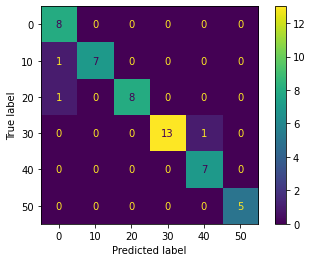

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns

import scipy.io as spio
mat=spio.loadmat('sokizSGF.mat', squeeze_me=True)
X=mat['xaallsgf']
y=mat['ysgf']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1,random_state=0)
svc=SVC(kernel='poly', degree=8)

print('---------------Cross-validation---------------')
scores=cross_val_score(svc,X_train,y_train,cv=7)
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

svc.fit(X_train,y_train)
y_test_pred=svc.predict(X_test)
print('\nAccuracy (train): ', accuracy_score(y_train,svc.predict(X_train)))
print('Accuracy (test): ', accuracy_score(y_test, y_test_pred))

labels=np.unique(y)
print(classification_report(y_test,y_test_pred,labels=labels))
print('\nConfusion matrix')
cm=confusion_matrix(y_test,y_test_pred)
print(pd.DataFrame(cm, index=['0%','10%','20%','30%','40%','50%'], columns=['pred: 0%','10%','20%','30%','40%','50%']))


print('\nConfusion matrix - plot') 
pcm = plot_confusion_matrix(svc, X_test, y_test, labels=labels) 
plt.show() 

4. Dokonano klasyfikacji SVM z wykorzystaniem wielomianowego jądra o stopniu 8. Taki stopień pozwala na najwyższą dokładność predykcji. Następnie dokonano walidacji krzyżowej. Parametry dobrano tak aby możliwie zmaksymalizować dokładność.
7. Uzyskana klasyfikacja ma wysoką dokładność testową i może być zastosowana w praktyce. Możliwe przeuczenie modelu można wyeliminować zmniejszając stopień wielomianu. Dla degree=7 :

Accuracy (train):  0.9978213507625272

Accuracy (test):  0.9215686274509803

**Stanisław Kaczmarski**